In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df1=pd.read_csv('Normal_Bearing.csv')
df2=pd.read_csv('Outer_Race_Fault_Set2.csv')
df3=pd.read_csv('Outer_Race_Fault_set3.csv')
df4=pd.read_csv('Inner_Race_Fault_Set1.csv')
df5=pd.read_csv('Roller_Element_Fault_Set1.csv')
df=pd.DataFrame()
df = pd.concat([df1,df2,df3,df4,df5])
df = df.reset_index(drop=True)
X = df.iloc[:,0:9]
y = df.iloc[:,-10]
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
df10 = pd.DataFrame(X_scaled)
df11 = df10.fillna(method="ffill")
X_scaleds = np.array(df11)
from sklearn.decomposition import PCA
pc = PCA(n_components=2)
X_pca = pc.fit_transform(X_scaleds)

principalDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])

principalDf['Fault']=np.array(df['Fault'])
principalDf


,principal component 1,principal component 2,Fault
0,-0.786492,-0.164316,Normal
1,-1.065210,-0.404221,Normal
2,-1.129773,-0.437235,Normal
3,-0.737755,-0.086072,Normal
4,-1.031489,-0.196760,Normal
...,...,...,...
2056,1.893320,-1.767448,Roller Element
2057,1.664302,-1.619112,Roller Element
2058,1.728602,-1.546484,Roller Element
2059,1.801522,-1.605284,Roller Element


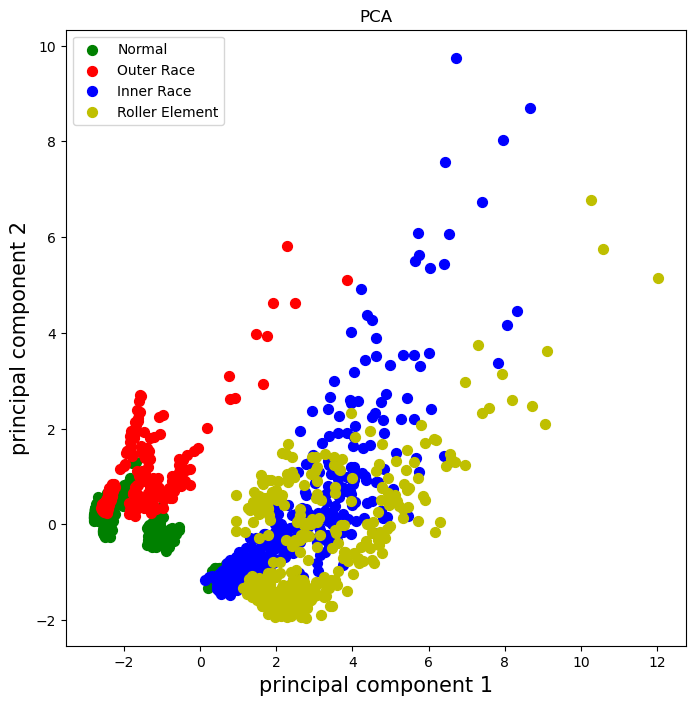

In [40]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('principal component 1', fontsize = 15)
ax.set_ylabel('principal component 2', fontsize = 15)
ax.set_title('2 point PCA')
fault = ['Normal','Outer Race','Inner Race','Roller Element']
colors = ['g','r','b','y']
for fault,color in zip(fault,colors):
    indicestokeep = principalDf['Fault']==fault
    ax.scatter(principalDf.loc[indicestokeep,'principal component 1'], principalDf.loc[indicestokeep,'principal component 2'],c=color,s=50)
ax.legend(['Normal', 'Outer Race', 'Inner Race', 'Roller Element'])


In [44]:
X = StandardScaler().fit_transform(X)
df10 = pd.DataFrame(X_scaled)
df11 = df10.fillna(method="ffill")
X_scaleds = np.array(df11)
pca_3 = PCA(n_components=3)

X_pca = pca_3.fit_transform(X_scaleds)

principalDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2','principal component 3'])

principalDf['Fault']=np.array(df['Fault'])
principalDf

,principal component 1,principal component 2,principal component 3,Fault
0,-0.786492,-0.164316,-0.012361,Normal
1,-1.065210,-0.404221,-0.489925,Normal
2,-1.129773,-0.437235,-0.240617,Normal
3,-0.737755,-0.086072,-0.362869,Normal
4,-1.031489,-0.196760,-0.580438,Normal
...,...,...,...,...
2056,1.893320,-1.767448,-0.312908,Roller Element
2057,1.664302,-1.619112,-0.568294,Roller Element
2058,1.728602,-1.546484,-0.497322,Roller Element
2059,1.801522,-1.605284,-0.306661,Roller Element


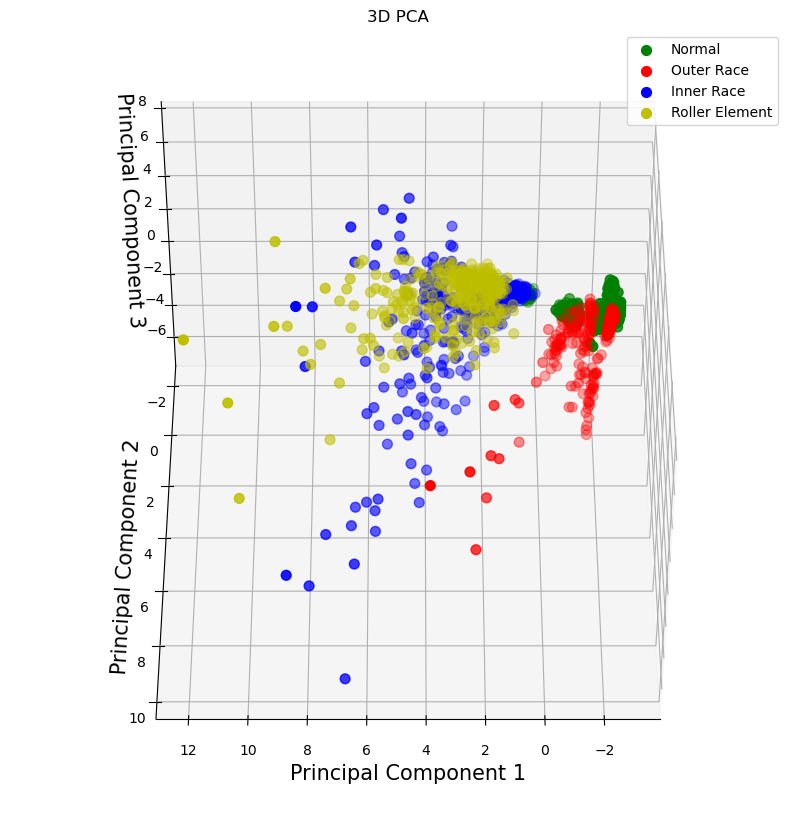

In [45]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,14))
  
# syntax for 3-D projection
ax = plt.axes(projection='3d')
  
# defining all 3 axes
fault = ['Normal', 'Outer Race', 'Inner Race', 'Roller Element']
colors = ['g', 'r','b','y']
for fault, color in zip(fault,colors):
    indicesToKeep = principalDf['Fault'] == fault
    ax.scatter3D(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , principalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(['Normal', 'Outer Race', 'Inner Race', 'Roller Element'])

  
# plotting
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('3D PCA')
ax.view_init(45,90)

plt.show()
